In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy

# A2.1 Estimating Pi

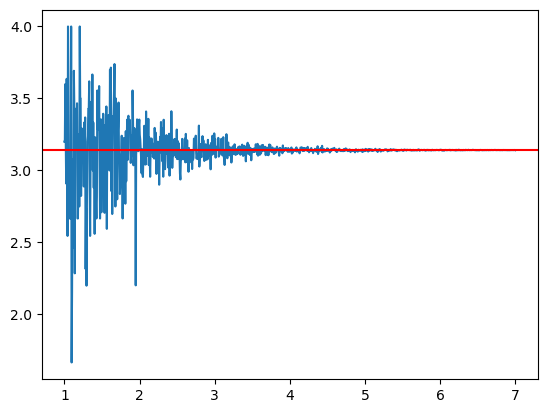

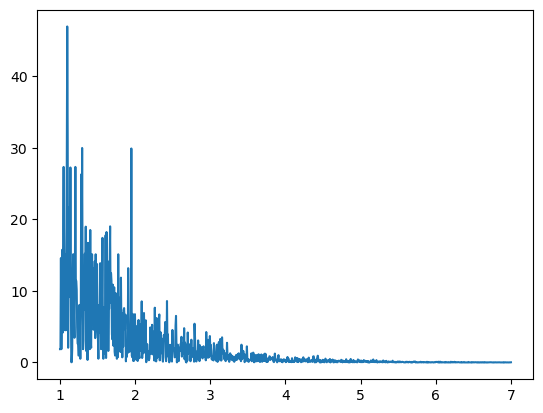

In [6]:
def estimate_pi(N):
    x = np.random.uniform(-1,1,(1,N))
    y = np.random.uniform(-1,1,(1,N))
    dist = np.square(x) + np.square(y)
    mask = dist <= 1
    return 4*np.sum(mask,1)[0]/N
logN = np.linspace(1,7,1000)
N = np.round(10**logN).astype(int)
Pis = np.array([estimate_pi(n) for n in N])

# plot 1
plt.plot(logN,Pis)
plt.axhline(math.pi,color="red")
plt.show()

# plot 2
Error = abs(Pis-math.pi)*100/math.pi
plt.plot(logN,Error)

# A2.2 Estimating Euler's Number


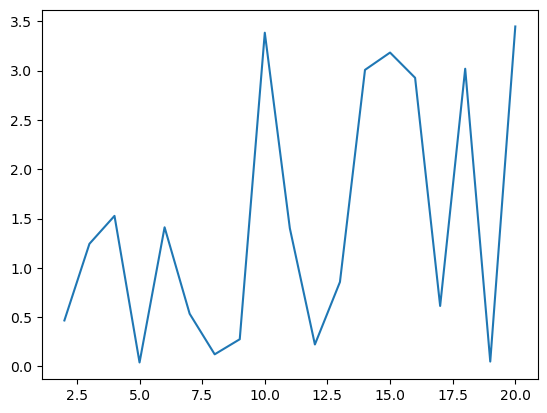

In [11]:
def estimate_e(N, t=2):
    x = np.random.uniform(1, t, N)
    y = np.random.uniform(0, 1, N)
    p_hat = np.mean(y <= 1/x)
    return t ** (1 / ((t - 1) * p_hat))


logN = np.linspace(1,7,1000)
# plot for t = 2 to 20 and N = 10,000
es2 = np.array([estimate_e(10000,t) for t in range(2,21)])
Error = abs(es2-math.e)*100/math.e
plt.plot(range(2,21),Error)
# N = np.round(10**logN).astype(int)
# es = np.array([estimate_e(n) for n in N])

# # plot 1
# plt.plot(logN,es)
# plt.axhline(math.e,color="red")
# plt.show()

# # plot 2
# Error = abs(es-math.e)*100/math.e
# plt.plot(logN,Error)


In [ ]:
# generating n's at 20 we already reach the floating point error range so it is not worth later

def estimate_e_vectorized(num_tests, max_len=20):
    U = np.random.rand(num_tests, max_len)
    U = np.concatenate([np.ones((num_tests, 1)), U], axis=1)
    decreasing = U[:, :-1] > U[:, 1:]
    first_fail = np.argmax(~decreasing, axis=1)
    n = first_fail + 1
    return np.mean(n)

# Non vector trivial
def one_trial(G=1.0):
    u_prev = G
    n = 1
    while True:
        u = np.random.rand()
        if u < u_prev:
            n += 1
            u_prev = u
        else:
            return n

def estimate_e(num_tests):
    ns = [one_trial(G=1.0) for _ in range(num_tests)]
    return np.mean(ns)


In [14]:
def run_simulation(predicate_func,bounds,num_samples):
    if len(bounds)!=4: raise AttributeError(bounds,"Size of bounds must be 4")
    x = np.random.uniform(*bounds[:2],(1,num_samples))
    y = np.random.uniform(*bounds[2:],(1,num_samples))
    mask = predicate_func(x,y)
    return  abs(bounds[1]-bounds[0])*abs(bounds[3]-bounds[2]) * np.sum(mask,1)[0]/num_samples

def is_in_circle(x,y):
    return x**2+y**2<=1


pi_area = run_simulation(is_in_circle,bounds=[-1,1,-1,1],num_samples=10000)
pi_area = run_simulation((lambda x,y: x**2+y**2<=1),bounds=[-1,1,-1,1],num_samples=10000)

print(pi_area)

3.1556


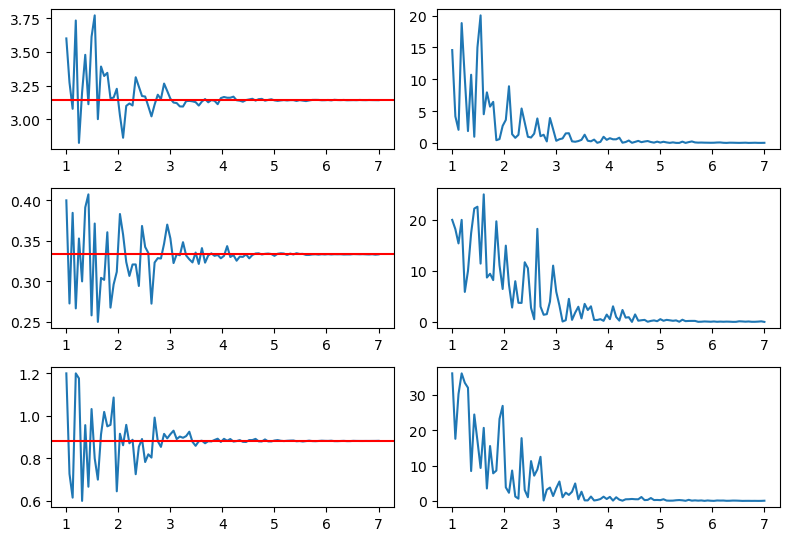

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

x = np.linspace(0, 2 * np.pi, 40)
y_sin = np.sin(x)
y_cos = np.cos(x)

logN = np.linspace(1,7,100)
N = np.round(10**logN).astype(int)

circles = np.array([run_simulation((lambda x,y: x**2+y**2<=1),bounds=[-1,1,-1,1],num_samples=n) for n in N])
parabolas = np.array([run_simulation((lambda x,y: y<=x**2),bounds=[0,1,0,1],num_samples=n) for n in N])
gaussian = np.array([run_simulation((lambda x,y: y<=np.exp(-x**2)),bounds=[0,2,0,1],num_samples=n) for n in N])
estiamted_gaussian = (np.sqrt(np.pi) / 2 )* scipy.special.erf(2)
axs[0,0].plot(logN,circles)
axs[0,0].axhline(math.pi,color="red")
axs[1,0].plot(logN,parabolas)
axs[1,0].axhline(1/3,color="red")
axs[2,0].plot(logN,gaussian)
axs[2,0].axhline(estiamted_gaussian,color="red")


axs[0,1].plot(logN,abs(circles-math.pi)*100/math.pi)
axs[1,1].plot(logN,abs(parabolas-(1/3))*100/(1/3))
axs[2,1].plot(logN,abs(gaussian-(estiamted_gaussian))*100/(estiamted_gaussian))



plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()